## Introduction
In this project, we are going to analyze the funding received by start-ups in India from 2018 to 2021. Our goal is to investigate the Indian start-up ecosystem and propose the best course of action for our team's venture into this market.

## Research Question
What are the trends in start-up funding in India from 2018 to 2021, and how can we leverage these trends to maximize our chances of success in the Indian start-up ecosystem?

## Hypothesis

Our hypothesis is that start-ups in certain sectors are more likely to receive funding and that the amount of funding received by start-ups is positively correlated with the number of investors and the stage of funding reached.
### Null Hypothesis(H0): 
There is a significant relationship between start-up sector and the amount of funding the start-up receives.
### Alternative Hypothesis(H1): 
There's no significant relationship between start-up sector and the amount of funding the start-up receives.

## Questions
1. What are the most popular sectors for start-ups in India from 2018 to 2021?
1. How has the total funding amount for start-ups changed over the years?
1. Which stage of funding (Seed, Series A, B, etc.) has received the most funding in India from 2018 to 2021?
1. Which start-ups have received the highest funding amounts, and what sectors do they belong to?
1. Are there any correlations between the amount of funding received, the number of investors, and the stage of funding reached?

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## load the datasets

In [2]:
# load 2021 dataset
df_21=pd.read_csv('startup_funding21.csv')
# load 2020 dataset
df_20=pd.read_csv('startup_funding2020.csv')
# load 2019 dataset
df_19=pd.read_csv('startup_funding2019.csv')
# load 2018 dataset
df_18=pd.read_csv('startup_funding2018.csv')

### Clean the 2021 data

In [3]:

df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [4]:
# shape
df_21.shape

(1207, 9)

In [5]:
# unique entries in Amount($)
df_21['Amount($)'].unique()

array(['$1,200,000 ', '$120,000,000 ', '$30,000,000 ', '$51,000,000 ',
       '$2,000,000 ', '$188,000,000 ', '$200,000 ', 'Undisclosed',
       '$1,000,000 ', '$3,000,000 ', '$100,000 ', '$700,000 ',
       '$9,000,000 ', '$40,000,000 ', '$49,000,000 ', '$400,000 ',
       '$300,000 ', '$25,000,000 ', '$160,000,000 ', '$150,000 ',
       '$1,800,000 ', '$5,000,000 ', '$850,000 ', '$53,000,000 ',
       '$500,000 ', '$1,100,000 ', '$6,000,000 ', '$800,000 ',
       '$10,000,000 ', '$21,000,000 ', '$7,500,000 ', '$26,000,000 ',
       '$7,400,000 ', '$1,500,000 ', '$600,000 ', '$800,000,000 ',
       '$17,000,000 ', '$3,500,000 ', '$15,000,000 ', '$215,000,000 ',
       '$2,500,000 ', '$350,000,000 ', '$5,500,000 ', '$83,000,000 ',
       '$110,000,000 ', '$500,000,000 ', '$65,000,000 ',
       '$150,000,000,000.00 ', '$300,000,000 ', '$2,200,000 ',
       '$35,000,000 ', '$140,000,000 ', '$4,000,000 ', '$13,000,000 ',
       nan, '$Undisclosed', '$9,500,000 ', '$8,000,000 ', '$12,000,0

In [6]:
df_21['Amount($)'].head()

0      $1,200,000 
1    $120,000,000 
2     $30,000,000 
3     $51,000,000 
4      $2,000,000 
Name: Amount($), dtype: object

In [7]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [8]:
# Find the total number of Undisclosed funding
undisclosed_count = df_21[df_21['Amount($)'] == 'Undisclosed']['Amount($)'].count()
undisclosed_count 

43

In [9]:
# clean Amount($) column
def clean_amount(amount_str):
    try:
        # Remove commas and dollar signs
        amount_str = amount_str.replace(',', '').replace('$', '')
        
        # Check for invalid strings
        if amount_str in ['Undisclosed']:
            return np.nan
        
        # Check for extra symbols
        if '$$' in amount_str:
            amount_str = amount_str.replace('$$', '$')
        
        return float(amount_str)
    except:
        return np.nan

df_21['Amount($)'] = df_21['Amount($)'].apply(clean_amount)


In [10]:
df_21['Amount($)'].dtype


dtype('float64')

In [11]:
df_21['Amount($)'].isna().sum()

144

In [12]:
# drop null values in the Amount($) column
df_21.dropna(subset=['Amount($)'],inplace=True)

In [13]:
df_21['Founded'].head()

0    2019
1    2015
2    2012
3    2015
4    2021
Name: Founded, dtype: int64

In [14]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


In [15]:
df_21['Stage'].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Series D1', 'Pre-series', 'Series A2',
       'Series I'], dtype=object)

In [16]:
df_21.isna().sum()

Company/Brand      0
Founded            0
HeadQuarter        3
Sector             0
What it does       0
Founders           4
Investor          58
Amount($)          0
Stage            358
dtype: int64

In [17]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


In [18]:
# fill blank HeadQuarter with unknown
df_21['HeadQuarter'].fillna('Unknown', inplace=True)


In [19]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


In [20]:
# Startups and the number of investors
investor_counts = df_21.groupby('Company/Brand')['Investor'].count().sort_values(ascending=False)
investor_counts.head()


Company/Brand
BharatPe     8
BYJU'S       4
Bewakoof     3
DealShare    3
Delhivery    3
Name: Investor, dtype: int64

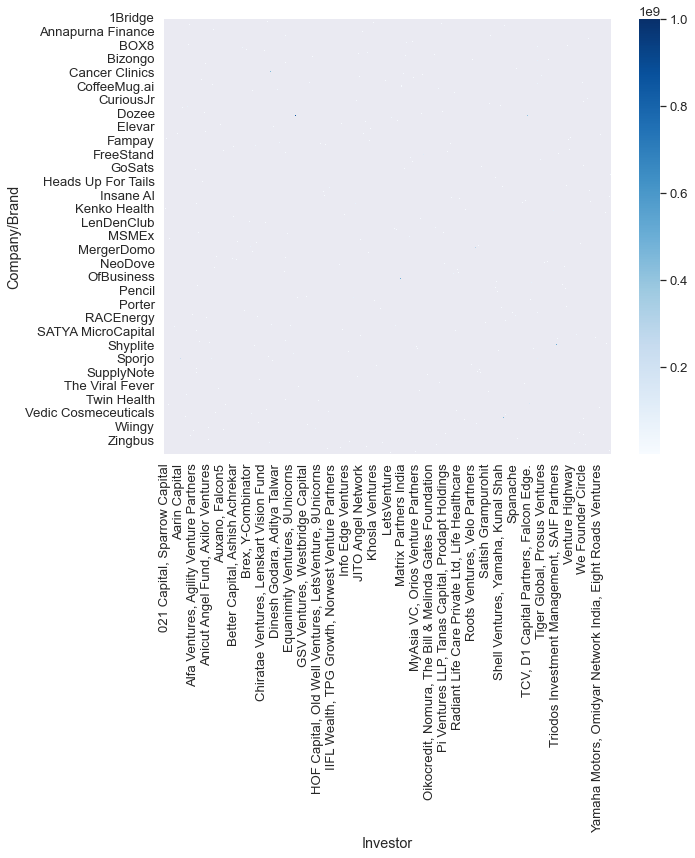

In [21]:
# create a pivot table of investors and funding
pivot_df = pd.pivot_table(df_21, values='Amount($)', index='Company/Brand', columns='Investor')

# create the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='Blues');

In [22]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


In [23]:
# group by funding
funding = df_21.groupby('Company/Brand')['Amount($)'].max().sort_values(ascending=False)
funding.head(20)

Company/Brand
Alteria Capital     1.500000e+11
VerSe Innovation    1.000000e+09
Dream Sports        8.400000e+08
Swiggy              8.000000e+08
OYO                 6.600000e+08
Zetwerk             6.000000e+08
Meesho              5.700000e+08
Ola                 5.000000e+08
ShareChat           5.000000e+08
BYJU'S              4.600000e+08
CARS24              4.500000e+08
BharatPe            3.700000e+08
PharmEasy           3.500000e+08
OfBusiness          3.250000e+08
Udaan               2.800000e+08
Delhivery           2.700000e+08
Mohalla Tech        2.660000e+08
CoinSwitch Kuber    2.600000e+08
Acko                2.550000e+08
CRED                2.500000e+08
Name: Amount($), dtype: float64

In [24]:

# convert the 'Amount($)' column to a numeric data type
df_21['Amount($)'] = df_21['Amount($)'].astype(float)

# group by sector and sum the funding amount
sector_funding = df_21.groupby('Sector')['Amount($)'].sum()

# get top 10 sectors with highest funding amount
top_10_sectors = sector_funding.nlargest(10)
# create a new dataframe with the top 10 sectors and their funding amounts
top_10_df = pd.DataFrame({'Sector': top_10_sectors.index, 'Funding Amount': top_10_sectors.values})

# print the dataframe
print(top_10_df)

                  Sector  Funding Amount
0                FinTech    1.526120e+11
1             Automotive    2.055700e+09
2                 EdTech    1.941530e+09
3     Financial Services    1.554950e+09
4             E-commerce    1.329445e+09
5  Innovation Management    1.000000e+09
6            Hospitality    9.218000e+08
7                 Sports    8.420000e+08
8          Food delivery    8.000000e+08
9        Social commerce    7.179000e+08


In [25]:
df_21['Stage'].unique

<bound method Series.unique of 0       Pre-series A
1                NaN
2           Series D
3           Series C
4               Seed
            ...     
1202    Pre-series A
1203        Series D
1204        Series C
1205        Series B
1206        Series A
Name: Stage, Length: 1063, dtype: object>

In [26]:
# Impute missing values in the Stage column with the mode
df_21['Stage'].fillna(df_21['Stage'].mode()[0], inplace=True)

In [27]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Seed
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


In [28]:
df_21['Company/Brand'].duplicated

<bound method Series.duplicated of 0       Unbox Robotics
1               upGrad
2          Lead School
3              Bizongo
4             FypMoney
             ...      
1202          Gigforce
1203            Vahdam
1204      Leap Finance
1205      CollegeDekho
1206            WeRize
Name: Company/Brand, Length: 1063, dtype: object>

In [29]:
# check for duplicates in Bizongo startup
df_21.loc[df_21['Company/Brand']=="Bizongo"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
223,Bizongo,2015,Mumbai,Information Technology & Services,Bizongo is India’s largest B2B platform for ma...,"Sachin Agrawal, Aniket Deb, Ankit Tomar",Tiger Global,100000000.0,Series D
275,Bizongo,2015,Mumbai,B2B Ecommerce,izongo is India’s largest B2B platform for mad...,"Sachin Agrawal, Aniket Deb, Ankit Tomar",Tiger Global,100000000.0,Series D


In [30]:
# drop row 275 which is a duplicate of row 223
df_21.drop([275],axis=0, inplace= True)

In [31]:
# check for duplicates in Fullife Healthcare
df_21.loc[df_21['Company/Brand']=="Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
240,Fullife Healthcare,2009,Unknown,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,22000000.0,Series C
254,Fullife Healthcare,2009,Unknown,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,22000000.0,Series C


In [32]:
# drop duplicate row in Fullife Healthcare
df_21.drop([254], axis=0, inplace= True)

In [33]:
# We can clearly see in the row at index 1148, the columns investor, amount and stage have wrong values
df_21.loc[df_21['Company/Brand'] == "Godamwale"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [34]:
# correcting errors at index 1148 
df_21.loc[df_21['Company/Brand']== "Godamwale", ["Amount($)","Stage","Investor"]] = [1000000,"Seed","ah! Ventures"]

df_21.loc[df_21['Company/Brand']== "Godamwale"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [35]:
# check row 672 for abnormalities
df_21.loc[df_21['Company/Brand']== "MYRE Capital"]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [36]:
# re-arrange the row entries in MYRE Capital
df_21.loc[df_21["Company/Brand"] =="MYRE Capital", ["Founders","Amount($)","Stage","Investor"]] = ["Aryaman Vir",6000000, "Seed","ITO Angel Network LetsVenture"]

df_21.loc[df_21["Company/Brand"] =="MYRE Capital"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [37]:
sector_df=(df_21.loc[:,'Sector']).value_counts()
sector_df.head(30)

FinTech                              109
EdTech                                85
Financial Services                    57
Information Technology & Services     36
E-commerce                            35
Food & Beverages                      30
Automotive                            29
E-learning                            23
Consumer Goods                        22
Healthcare                            21
AgriTech                              19
Gaming                                18
HealthCare                            17
Retail                                17
Logistics & Supply Chain              16
Health, Wellness & Fitness            16
Computer Software                     15
Logistics                             13
HealthTech                            12
Hospitality                           12
Hospital & Health Care                11
SaaS startup                          11
Tech Startup                           9
Media                                  8
Insurance       

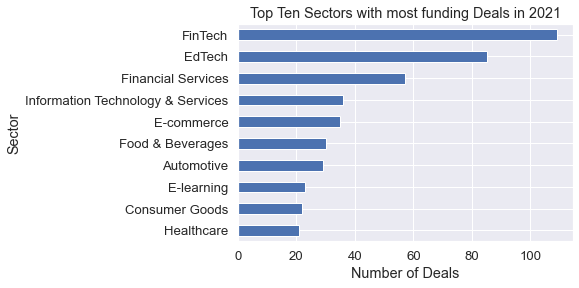

In [38]:
sector_df.head(10).sort_values().plot.barh()
plt.xlabel('Number of Deals')
plt.ylabel('Sector')
plt.title('Top Ten Sectors with most funding Deals in 2021');

In [39]:
df_21['Year_of_Funding']='2021'
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year_of_Funding
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Seed,2021
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


In [40]:
df_21['HeadQuarter'].sample(60).value_counts()

Bangalore     29
Gurugram       6
Mumbai         6
New Delhi      5
Pune           4
Hyderabad      2
Ghaziabad      1
Goa            1
Chennai        1
Chandigarh     1
Kolkata        1
Ahmadabad      1
Ambernath      1
Noida          1
Name: HeadQuarter, dtype: int64

## Clean 2020 data

In [41]:
df_20.head()

,1MG,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Zvesta,1973.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN
1,Zuper,1978.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed
2,Zupee,1982.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed
3,ZunRoof,1994.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,Zoomcar,1995.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN


In [42]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1MG           1055 non-null   object 
 1   Founded       869 non-null    float64
 2   HeadQuarter   971 non-null    object 
 3   Sector        1042 non-null   object 
 4   What it does  1055 non-null   object 
 5   Founders      1043 non-null   object 
 6   Investor      1017 non-null   object 
 7   Amount($)     1052 non-null   object 
 8   Stage         591 non-null    object 
dtypes: float64(1), object(8)
memory usage: 74.3+ KB


In [43]:
df_20.isna().sum()

1MG               0
Founded         186
HeadQuarter      84
Sector           13
What it does      0
Founders         12
Investor         38
Amount($)         3
Stage           464
dtype: int64

In [44]:
df_20.head()

,1MG,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Zvesta,1973.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN
1,Zuper,1978.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed
2,Zupee,1982.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed
3,ZunRoof,1994.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,Zoomcar,1995.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN


In [45]:
df_20['HeadQuarter'].value_counts()

Bangalore                 318
Mumbai                    166
Gurugram                   81
Delhi                      62
Chennai                    43
                         ... 
Jiaxing                     1
Rajastan                    1
Tirunelveli, Tamilnadu      1
Ludhiana                    1
Tangerang, Indonesia        1
Name: HeadQuarter, Length: 67, dtype: int64

In [46]:
df_20=df_20.rename(columns={'1MG':'Company/Brand'})

In [47]:
df_20['Founded'].astype(str)

0       1973.0
1       1978.0
2       1982.0
3       1994.0
4       1995.0
         ...  
1050       nan
1051       nan
1052       nan
1053       nan
1054       nan
Name: Founded, Length: 1055, dtype: object

In [48]:
df_20.dtypes

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
dtype: object

In [49]:

df_20['HeadQuarter'] = df_20['HeadQuarter'].apply(str)


df_20['HeadQuarter'] = df_20['HeadQuarter'].str.split(',').str[0]

df_20['HeadQuarter'] = df_20['HeadQuarter'].replace("'","",regex= True)
df_20

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Zvesta,1973.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN
1,Zuper,1978.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed
2,Zupee,1982.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed
3,ZunRoof,1994.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,Zoomcar,1995.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN
...,...,...,...,...,...,...,...,...,...
1050,Aadhar,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN
1051,91springboard,NaN,nan,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round
1052,6Degree,NaN,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN
1053,5C Network,NaN,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C


In [50]:
# clean Amount($) column
def clean_amount(amount_str):
    try:
        # Remove commas and dollar signs
        amount_str = amount_str.replace(',', '').replace('$', '')
        
        # Check for invalid strings
        if amount_str in ['Undisclosed']:
            return np.nan
        
        return float(amount_str)
    except:
        return np.nan

df_20['Amount($)'] = df_20['Amount($)'].apply(clean_amount)

In [51]:
# add column Year of Funding
df_20['Year_of_Funding']="2020"

In [52]:
df_20=df_20[['Company/Brand','Founded','HeadQuarter','Sector','Founders','Investor','Amount($)','Stage','Year_of_Funding','What it does']]

In [53]:
df_20.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year_of_Funding,What it does
0,Zvesta,1973.0,Chennai,AgriTech,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020,Cultivating Ideas for Profit
1,Zuper,1978.0,Bangalore,EdTech,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020,An academy-guardian-scholar centric ecosystem ...
2,Zupee,1982.0,Pune,Hygiene management,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020,Converting bio-hazardous waste to harmless waste
3,ZunRoof,1994.0,New Delhi,Escrow,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,2020,Escrow-as-a-service platform
4,Zoomcar,1995.0,Indore,AgriTech,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,2020,Gramophone is an AgTech platform enabling acce...


In [54]:
df_clean_20=df_20
df_clean_20.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year_of_Funding,What it does
0,Zvesta,1973.0,Chennai,AgriTech,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020,Cultivating Ideas for Profit
1,Zuper,1978.0,Bangalore,EdTech,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020,An academy-guardian-scholar centric ecosystem ...
2,Zupee,1982.0,Pune,Hygiene management,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020,Converting bio-hazardous waste to harmless waste
3,ZunRoof,1994.0,New Delhi,Escrow,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,2020,Escrow-as-a-service platform
4,Zoomcar,1995.0,Indore,AgriTech,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,2020,Gramophone is an AgTech platform enabling acce...


## Clean 2019 data

In [55]:
df_19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [56]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [57]:
def clean_amount(amount_str):
    try:
        # Remove commas and dollar signs
        amount_str = amount_str.replace(',', '').replace('$', '')
        
        # Check for invalid strings
        if amount_str in ['Undisclosed']:
            return np.nan
        
        return float(amount_str)
    except:
        return np.nan

df_19['Amount($)'] = df_19['Amount($)'].apply(clean_amount)

In [58]:
df_19['Year_of_Funding']="2019"

In [59]:
df_19=df_19[['Company/Brand','Founded','HeadQuarter','Sector','Founders','Investor','Amount($)','Stage','Year_of_Funding','What it does']]

In [60]:
df_19.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year_of_Funding,What it does
0,Bombay Shaving,NaN,NaN,Ecommerce,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019,Provides a range of male grooming products
1,Ruangguru,2014.0,Mumbai,Edtech,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019,A learning platform that provides topic-based ...
2,Eduisfun,NaN,Mumbai,Edtech,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019,It aims to make learning fun via games.
3,HomeLane,2014.0,Chennai,Interior design,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019,Provides interior designing solutions
4,Nu Genes,2004.0,Telangana,AgriTech,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019,"It is a seed company engaged in production, pr..."


## Clean 2018 Data

In [61]:
df_18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"?40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"?65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [62]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [63]:
df_18['Industry'] = df_18['Industry'].apply(str)
df_18['Industry'] = df_18['Industry'].str.split(',').str[0]
df_18['Industry'] = df_18['Industry'].replace("'","",regex=True)

In [64]:
df_18['Location'] = df_18['Location'].apply(str)
df_18['Location'] = df_18['Location'].str.split(',').str[0]
df_18['Location'] = df_18['Location'].replace("'","",regex = True)

In [65]:
df_18['Amount'].value_counts()

—              148
1000000         24
500000          13
2000000         12
?50,000,000      9
              ... 
2200000          1
1200000          1
$15,000          1
$1,041,000       1
35000000         1
Name: Amount, Length: 198, dtype: int64

In [66]:
df_18['Amount'] = df_18['Amount'].apply(str)



df_18['Amount'] = df_18['Amount'].replace(",","",regex = True)
df_18['Amount'] = df_18['Amount'].replace("—",0)
df_18['Amount'] = df_18['Amount'].replace("$","")
df_18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,Agriculture,Seed,?40000000,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,?65000000,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...


In [67]:
df_18['Amount'] = df_18['Amount'].replace(",","")
df_18.tail(20)

,Company Name,Industry,Round/Series,Amount,Location,About Company
506,Verzeo,E-Learning,Series A,5000000,Bangalore,Verzeo is anAI-focussed edtech startup.
507,Haazri,Food and Beverage,Seed,?12500000,Mumbai,Haazri is a tea and snack quick service restau...
508,Connect India,Delivery Service,Angel,0,New Delhi,To create pervasive network where connections ...
509,Flyrobe,Fashion,Series B,?264000000,Mumbai,Flyrobe is an on-demand apparel rental platfor...
510,Scholify,—,Pre-Seed,0,Bengaluru,Edutech
511,Dream11,Fantasy Sports,Series D,100000000,Mumbai,Dream11 is India’s Biggest Sports Game with 30...
512,srJna,Education,Seed,0,Jaipur,"SRJNA is a brand of Elation Edtech Pvt. Ltd., ..."
513,Nykaa,Beauty,Secondary Market,?1130000000,Mumbai,Nykaa.com is a premier online beauty and welln...
514,Chaayos,Food and Beverage,Series B,?810000000,New Delhi,Chaayos was born in November 2012 out of this ...
515,Heelium,Fitness,Seed,0,Pune,Heelium is an athletic footwear and wearable s...


In [68]:
# split '₹' represented as '?' which is the Indian rupee and convert it to USD 
df_18['INR_Amount'] = df_18['Amount'].str.rsplit('?',n =2).str[1]
df_18.head()
df_18['INR_Amount'] = df_18['INR_Amount'].apply(float).fillna(0)
df_18.head()
df_18['USD_Amount'] = df_18['INR_Amount']*0.01208
df_18.head()
df_18['USD_Amount'] = df_18['USD_Amount'].replace(0,np.nan)
df_18.head()
df_18['USD_Amount'] = df_18['USD_Amount'].fillna(df_18['Amount'])
df_18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,INR_Amount,USD_Amount
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",0.0,250000
1,Happy Cow Dairy,Agriculture,Seed,?40000000,Mumbai,A startup which aggregates milk from dairy far...,40000000.0,483200.0
2,MyLoanCare,Credit,Series A,?65000000,Gurgaon,Leading Online Loans Marketplace in India,65000000.0,785200.0
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,0.0,2000000
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,0.0,0


In [69]:
df_18['USD_Amount'] = df_18['USD_Amount'].apply(str)
df_18['USD_Amount'] = df_18['USD_Amount'].replace('$','',regex = True)

In [70]:
df_18['USD_Amount'] = df_18['USD_Amount'].apply(lambda x: float(str(x).replace("$","")))
df_18['USD_Amount'].value_counts()

0.0          148
1000000.0     27
2000000.0     15
500000.0      13
5000000.0      9
            ... 
1800000.0      1
2200000.0      1
1200000.0      1
15000.0        1
7500.0         1
Name: USD_Amount, Length: 180, dtype: int64

In [71]:
df_18['USD_Amount'] = df_18['USD_Amount'].replace(0,np.nan)
df_18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,INR_Amount,USD_Amount
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",0.0,250000.0
1,Happy Cow Dairy,Agriculture,Seed,?40000000,Mumbai,A startup which aggregates milk from dairy far...,40000000.0,483200.0
2,MyLoanCare,Credit,Series A,?65000000,Gurgaon,Leading Online Loans Marketplace in India,65000000.0,785200.0
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,0.0,2000000.0
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,0.0,NaN


In [72]:
df_18.drop(columns= ['INR_Amount','Amount'], inplace = True)
df_18.head()

,Company Name,Industry,Round/Series,Location,About Company,USD_Amount
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN


In [73]:
df_18.rename(columns={'USD_Amount':'Amount($)'}, inplace=True)
df_18.sample(15)

,Company Name,Industry,Round/Series,Location,About Company,Amount($)
89,Tranzmeo,Artificial Intelligence,Pre-Seed,Cochin,Tranzmeo Connect : is A Complete Comprehensive...,NaN
43,Coutloot,E-Commerce,Seed,Mumbai,The Fashion Re-commerce platform.,1000000.0
440,Virtual MetalStreet(MetalStreet),B2B,Angel,Bengaluru,Virtual MetalStreet(Metalstreet) is a B2B mark...,700000.0
472,Sequretek,—,Venture - Series Unknown,Mumbai,Sequretek is a cyber security start-up.,3700000.0
246,The Ken,Digital Media,Series A,Bengaluru,The Ken is India’s first subscriptions-only bu...,1500000.0
131,Wakefit,Manufacturing,Venture - Series Unknown,Bangalore,Wakefitkart is a mattress manufacturing compan...,7852000.0
438,Vivish Technologies (myGate),Apps,Series A,Bengaluru,India's leading mobile based security manageme...,7852000.0
171,Avishkaar Box,Children,Seed,Delhi,Avishkaar Box is just not another box full of ...,604000.0
92,Design Cafe,Home Decor,Series B,Bengaluru,Design + Execution Organization that delivers ...,24160000.0
513,Nykaa,Beauty,Secondary Market,Mumbai,Nykaa.com is a premier online beauty and welln...,13650400.0


In [74]:
df_18['Round/Series'] = df_18['Round/Series'].replace("https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593", "Seed")

In [75]:
df_18['Year_of_Funding']='2018'
df_18.head()

,Company Name,Industry,Round/Series,Location,About Company,Amount($),Year_of_Funding
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0,2018
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0,2018
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018


# Combined Dataframe

In [76]:
combined_df=pd.concat([df_19,df_20,df_21], ignore_index=True)
combined_df.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year_of_Funding,What it does
0,Bombay Shaving,NaN,NaN,Ecommerce,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019,Provides a range of male grooming products
1,Ruangguru,2014.0,Mumbai,Edtech,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019,A learning platform that provides topic-based ...
2,Eduisfun,NaN,Mumbai,Edtech,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019,It aims to make learning fun via games.
3,HomeLane,2014.0,Chennai,Interior design,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019,Provides interior designing solutions
4,Nu Genes,2004.0,Telangana,AgriTech,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019,"It is a seed company engaged in production, pr..."


In [77]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    2205 non-null   object 
 1   Founded          1990 non-null   float64
 2   HeadQuarter      2186 non-null   object 
 3   Sector           2187 non-null   object 
 4   Founders         2186 non-null   object 
 5   Investor         2109 non-null   object 
 6   Amount($)        1945 non-null   float64
 7   Stage            1695 non-null   object 
 8   Year_of_Funding  2205 non-null   object 
 9   What it does     2205 non-null   object 
dtypes: float64(2), object(8)
memory usage: 172.4+ KB


In [78]:
combined_df.shape

(2205, 10)

In [79]:
df_18.columns = ["Company/Brand","Sector","Stage","HeadQuarter","What it does","Amount($)","Year_of_Funding"]
df_18.head()

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0,2018
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0,2018
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018


## Complete Dataframe

In [80]:
complete_df=pd.concat([df_18,combined_df], ignore_index=True)
complete_df.head(15)

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018,NaN,NaN,NaN
5,Hasura,Cloud Infrastructure,Seed,Bengaluru,Hasura is a platform that allows developers to...,1600000.0,2018,NaN,NaN,NaN
6,Tripshelf,Internet,Seed,Kalkaji,Tripshelf is an online market place for holida...,193280.0,2018,NaN,NaN,NaN
7,Hyperdata.IO,Market Research,Angel,Hyderabad,Hyperdata combines advanced machine learning w...,604000.0,2018,NaN,NaN,NaN
8,Freightwalla,Information Services,Seed,Mumbai,Freightwalla is an international forwarder tha...,NaN,2018,NaN,NaN,NaN
9,Microchip Payments,Mobile Payments,Seed,Bangalore,Microchip payments is a mobile-based payment a...,NaN,2018,NaN,NaN,NaN


In [81]:
unique_brands = (complete_df.loc[:,"Company/Brand"]).value_counts()
unique_brands

BharatPe                10
Zomato                   7
Nykaa                    7
Vedantu                  6
Spinny                   6
                        ..
Simsim                   1
Sindhuja Microcredit     1
SirionLabs               1
Skilancer                1
WeRize                   1
Name: Company/Brand, Length: 2111, dtype: int64

In [82]:
complete_df["Company/Brand"] = complete_df["Company/Brand"].apply(lambda x: str(x).capitalize())

In [83]:
complete_df.drop(columns={'Founded','Founders','What it does'}, inplace= True)

In [84]:
complete_df.loc[complete_df["Company/Brand"]=="Byju","Company/Brand"] = "Byju's"
complete_df.loc[:,"Company/Brand"].value_counts().head(10)

Bharatpe     10
Byju's       10
Zomato        7
Nykaa         7
Oyo           6
Trell         6
Vedantu       6
Zetwerk       6
Spinny        6
Jumbotail     5
Name: Company/Brand, dtype: int64

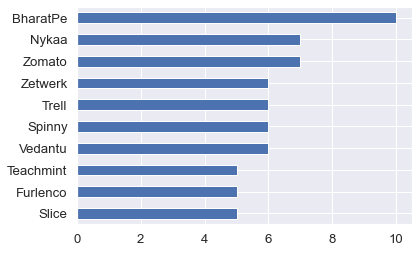

In [85]:
unique_brands.head(10).sort_values().plot.barh();

### Sector 
Similar sectors have to be grouped into one for easy analysis and easy visualization

In [86]:
complete_df["Sector"].value_counts()

FinTech                  162
EdTech                   131
Fintech                   85
Financial Services        84
Edtech                    74
                        ... 
Warehouse                  1
Entreprenurship            1
Social Network             1
Deeptech startup           1
Staffing & Recruiting      1
Name: Sector, Length: 580, dtype: int64

In [87]:
complete_df['Sector'] = complete_df["Sector"].apply(lambda x: str(x).capitalize())


complete_df['Sector'] = complete_df["Sector"].apply(lambda x: str(x).replace(" and ", " & "))
complete_df["Sector"] = complete_df["Sector"].apply(lambda x: str(x).replace("startup", ""))
complete_df["Sector"]  = complete_df["Sector"].apply(lambda x: str(x).replace("  ", " "))

In [88]:
complete_df.loc[complete_df["Sector"] == "Accomodation", "Sector"] = "Housing & real estate"
complete_df.loc[complete_df["Sector"] == "Accounting", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Ad-tech", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Advertisement", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Advertising", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Advisory firm", "Sector"] = "Advisory & consultancy"
complete_df.loc[complete_df["Sector"] == "Aerospace", "Sector"] = "Aviation & aerospace"
complete_df.loc[complete_df["Sector"] == "Aero company", "Sector"] = "Aviation & aerospace"
complete_df.loc[complete_df["Sector"] == "Aerospace", "Sector"] = "Aviation & aerospace"
complete_df.loc[complete_df["Sector"] == "Agri tech", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"] == "Agriculture", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"] == "Agritech", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"] == "Agritech/commerce", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"] == "Agtech", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"] == "Ai & data science", "Sector"] = "Ai"

In [89]:
complete_df.loc[complete_df["Sector"] == "Ai & debt", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Ai & deep learning", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Ai & media", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Ai & tech", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Ai chatbot", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Ai company", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Ai health", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Ai platform", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Ai robotics", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Ai", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Air transportation", "Sector"] = "Aviation & aerospace"
complete_df.loc[complete_df["Sector"] == "Alternative medicine", "Sector"] = "Medical"
complete_df.loc[complete_df["Sector"] == "Analytics", "Sector"] = "Data science & analytics"
complete_df.loc[complete_df["Sector"] == "Appliance", "Sector"] = "Appliances & Electronics"
complete_df.loc[complete_df["Sector"] == "Apps", "Sector"] = "Software"
complete_df.loc[complete_df["Sector"] == "Ar platform", "Sector"] = "AR/VR"

In [90]:
complete_df.loc[complete_df["Sector"] == "Ar", "Sector"] = "AR/VR"
complete_df.loc[complete_df["Sector"] == "Ar/vr", "Sector"] = "AR/VR"
complete_df.loc[complete_df["Sector"] == "Artificial intelligence", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Audio", "Sector"] = "Entertainment"
complete_df.loc[complete_df["Sector"] == "Augmented reality", "Sector"] = "AR/VR"
complete_df.loc[complete_df["Sector"] == "Auto-tech", "Sector"] = "Automation tech"
complete_df.loc[complete_df["Sector"] == "Automation", "Sector"] = "Automation tech"
complete_df.loc[complete_df["Sector"] == "Automobile & technology", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Automobile technology", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Automobile", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Automobiles", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Automotive & rentals", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Automotive and rentals", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Automotive company", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Automotive tech", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Automotive", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Autonomous vehicles", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Aviation", "Sector"] = "Aviation & aerospace"
complete_df.loc[complete_df["Sector"] == "Ayurveda tech", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "B2b agritech", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"] == "B2b e-commerce", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "B2b ecommerce", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "B2b manufacturing", "Sector"] = "Manufacturing"

In [91]:
complete_df.loc[complete_df["Sector"] == "B2b marketplace", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "B2b service", "Sector"] = "B2b"
complete_df.loc[complete_df["Sector"] == "B2b supply chain", "Sector"] = "Logistics & supply chain"
complete_df.loc[complete_df["Sector"] == "B2b travel", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "B2b", "Sector"] = "B2b"
complete_df.loc[complete_df["Sector"] == "Banking", "Sector"] = "Financial Services"
complete_df.loc[complete_df["Sector"] == "Battery design", "Sector"] = "Battery"
complete_df.loc[complete_df["Sector"] == "Battery manufacturer", "Sector"] = "Battery"
complete_df.loc[complete_df["Sector"] == "Beauty & wellness", "Sector"] = "Beauty"
complete_df.loc[complete_df["Sector"] == "Beauty products", "Sector"] = "Beauty"
complete_df.loc[complete_df["Sector"] == "Beverage", "Sector"] = "Consumer goods & services"
complete_df.loc[complete_df["Sector"] == "Beverage", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Beverages", "Sector"] = "Consumer goods & services"
complete_df.loc[complete_df["Sector"] == "Big data", "Sector"] = "Data science & analytics"
complete_df.loc[complete_df["Sector"] == "Bike marketplace", "Sector"] = "Bike services"
complete_df.loc[complete_df["Sector"] == "Bike rental", "Sector"] = "Bike services"
complete_df.loc[complete_df["Sector"] == "Biopharma", "Sector"] = "Pharmaceutical"
complete_df.loc[complete_df["Sector"] == "Biotech", "Sector"] = "Biotechnology"
complete_df.loc[complete_df["Sector"] == "Biotechnology company", "Sector"] = "Biotechnology"
complete_df.loc[complete_df["Sector"] == "Biotechnology", "Sector"] = "Biotechnology"
complete_df.loc[complete_df["Sector"] == "Blockchain", "Sector"] = "Cryptocurrency"
complete_df.loc[complete_df["Sector"] == "Blogging", "Sector"] = "Content services"
complete_df.loc[complete_df["Sector"] == "Brand marketing", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Broadcasting", "Sector"] = "Information services"
complete_df.loc[complete_df["Sector"] == "Business development", "Sector"] = "Advisory & consultancy"

In [92]:
#complete_set.loc[complete_set["Sector"] == "Business intelligence", "Sector"] = "Data science & analytics"
complete_df.loc[complete_df["Sector"] == "Business travel", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Cannabis", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"] == "Capital markets", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Car service", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Car trade", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Catering", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Children", "Sector"] = "Child care"
complete_df.loc[complete_df["Sector"] == "Classifieds", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "Clean energy", "Sector"] = "Clean energy"
complete_df.loc[complete_df["Sector"] == "Clean energy", "Sector"] = "Energy"
complete_df.loc[complete_df["Sector"] == "Cleantech", "Sector"] = "Clean energy"
complete_df.loc[complete_df["Sector"] == "Cleantech", "Sector"] = "Energy"
complete_df.loc[complete_df["Sector"] == "Clothing", "Sector"] = "Apparel & fashion"
complete_df.loc[complete_df["Sector"] == "Cloud company", "Sector"] = "Cloud computing"
complete_df.loc[complete_df["Sector"] == "Cloud infrastructure", "Sector"] = "Cloud computing"
complete_df.loc[complete_df["Sector"] == "Commerce", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Commercial real estate", "Sector"] = "Housing & real estate"
complete_df.loc[complete_df["Sector"] == "Commercial", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Communities", "Sector"] = "Social media & communities"
complete_df.loc[complete_df["Sector"] == "Communities", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "Community platform", "Sector"] = "Social media & communities"
complete_df.loc[complete_df["Sector"] == "Community platform", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "Community", "Sector"] = "Social media & communities"
complete_df.loc[complete_df["Sector"] == "Community", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "Computer games", "Sector"] = "Games"
complete_df.loc[complete_df["Sector"] == "Computer software", "Sector"] = "Software"
complete_df.loc[complete_df["Sector"] == "Construction tech", "Sector"] = "Construction"
complete_df.loc[complete_df["Sector"] == "Consultancy", "Sector"] = "Advisory & consultancy"
complete_df.loc[complete_df["Sector"] == "Consulting", "Sector"] = "Advisory & consultancy"
complete_df.loc[complete_df["Sector"] == "Consumer appliances", "Sector"] = "Consumer goods & services"
complete_df.loc[complete_df["Sector"] == "Consumer applications", "Sector"] = "Consumer goods & services"
complete_df.loc[complete_df["Sector"] == "Consumer electronics", "Sector"] = "Consumer goods & services"
complete_df.loc[complete_df["Sector"] == "Consumer goods", "Sector"] = "Consumer goods & services"

In [93]:
complete_df.loc[complete_df["Sector"] == "Consumer lending", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Consumer service", "Sector"] = "Consumer goods & services"
complete_df.loc[complete_df["Sector"] == "Consumer services", "Sector"] = "Consumer goods & services"
complete_df.loc[complete_df["Sector"] == "Consumer software", "Sector"] = "Consumer goods & services"
complete_df.loc[complete_df["Sector"] == "Consumer software", "Sector"] = "Software"
complete_df.loc[complete_df["Sector"] == "Consumer", "Sector"] = "Consumer goods & services"
complete_df.loc[complete_df["Sector"] == "Content commerce", "Sector"] = "Content services"
complete_df.loc[complete_df["Sector"] == "Content creation", "Sector"] = "Content services"
complete_df.loc[complete_df["Sector"] == "Content management", "Sector"] = "Content services"
complete_df.loc[complete_df["Sector"] == "Content marketplace", "Sector"] = "Content services"
complete_df.loc[complete_df["Sector"] == "Content marktplace", "Sector"] = "Content services"
complete_df.loc[complete_df["Sector"] == "Content publishing", "Sector"] = "Content services"
complete_df.loc[complete_df["Sector"] == "Continuing education", "Sector"] = "Education"
complete_df.loc[complete_df["Sector"] == "Conversational ai platform", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Cooking", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Cosmetics", "Sector"] = "Beauty"
complete_df.loc[complete_df["Sector"] == "Coworking", "Sector"] = "Co-working"
complete_df.loc[complete_df["Sector"] == "Creative agency", "Sector"] = "Arts & crafts"
complete_df.loc[complete_df["Sector"] == "Credit cards", "Sector"] = "Financial Services"
complete_df.loc[complete_df["Sector"] == "Credit", "Sector"] = "Financial Services"
complete_df.loc[complete_df["Sector"] == "Crm", "Sector"] = "Customer service"
complete_df.loc[complete_df["Sector"] == "Crypto", "Sector"] = "Cryptocurrency"
complete_df.loc[complete_df["Sector"] == "Customer service company", "Sector"] = "Customer service"
complete_df.loc[complete_df["Sector"] == "Cybersecurity", "Sector"] = "Computer & network security"
complete_df.loc[complete_df["Sector"] == "D2c business", "Sector"] = "D2c"
complete_df.loc[complete_df["Sector"] == "D2c fashion", "Sector"] = "Apparel & fashion"
complete_df.loc[complete_df["Sector"] == "D2c jewellery", "Sector"] = "Jewellery"
complete_df.loc[complete_df["Sector"] == "Dairy", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Data analytics", "Sector"] = "Data science & analytics"
complete_df.loc[complete_df["Sector"] == "Data intelligence", "Sector"] = "Data science & analytics"
complete_df.loc[complete_df["Sector"] == "Data science", "Sector"] = "Data science & analytics"
complete_df.loc[complete_df["Sector"] == "Dating app", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "Dating", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "Deep tech ai", "Sector"] = "Deep Tech"
complete_df.loc[complete_df["Sector"] == "Deep tech", "Sector"] = "Deep Tech"

In [94]:
complete_df.loc[complete_df["Sector"] == "Deeptech", "Sector"] = "Deep Tech"
complete_df.loc[complete_df["Sector"] == "Defense & space", "Sector"] = "Defense"
complete_df.loc[complete_df["Sector"] == "Defense tech", "Sector"] = "Defense"
complete_df.loc[complete_df["Sector"] == "Designing", "Sector"] = "Design"
complete_df.loc[complete_df["Sector"] == "Delivery service", "Sector"] = "Logistics & supply chain"
complete_df.loc[complete_df["Sector"] == "Delivery", "Sector"] = "Logistics & supply chain"
complete_df.loc[complete_df["Sector"] == "Dental", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Design", "Sector"] = ""
complete_df.loc[complete_df["Sector"] == "Dietary supplements", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Digital entertainment", "Sector"] = "Entertainment"
complete_df.loc[complete_df["Sector"] == "Digital marketing", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Digital media", "Sector"] = "Information services"
complete_df.loc[complete_df["Sector"] == "Digital mortgage", "Sector"] = "Financial Services"
complete_df.loc[complete_df["Sector"] == "E store", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "E-commerce & ar", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "E-commerce platforms", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "E-commerce", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "E-learning", "Sector"] = "Education"
complete_df.loc[complete_df["Sector"] == "E-market", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "E-marketplace", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "E-mobility", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "E-sports", "Sector"] = "Sports"
complete_df.loc[complete_df["Sector"] == "E-tail", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "Ecommerce", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "Edtech", "Sector"] = "Education"
complete_df.loc[complete_df["Sector"] == "Edttech", "Sector"] = "Edtech"
complete_df.loc[complete_df["Sector"] == "Edttech", "Sector"] = "Education"
complete_df.loc[complete_df["Sector"] == "Education management", "Sector"] = "Education"
complete_df.loc[complete_df["Sector"] == "Electricity", "Sector"] = "Energy"
complete_df.loc[complete_df["Sector"] == "Electronics", "Sector"] = "Appliances & Electronics"
complete_df.loc[complete_df["Sector"] == "Emobility", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Energy", "Sector"] = "Energy"
complete_df.loc[complete_df["Sector"] == "Enterprise software", "Sector"] = "Enterprise resource planning (erp)"
complete_df.loc[complete_df["Sector"] == "Environmental consulting", "Sector"] = "Environmental services"

In [95]:
complete_df.loc[complete_df["Sector"] == "Environmental service", "Sector"] = "Environmental services"
complete_df.loc[complete_df["Sector"] == "Equity management", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Esports", "Sector"] = "Sports"
complete_df.loc[complete_df["Sector"] == "Estore", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "Ev", "Sector"] = "Electric vehicle"
complete_df.loc[complete_df["Sector"] == "Events", "Sector"] = "Entertainment"
complete_df.loc[complete_df["Sector"] == "Eye wear", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Eyeglasses", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Eyewear", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Facilities support service", "Sector"] = "Facilities services"
complete_df.loc[complete_df["Sector"] == "Fantasy sports", "Sector"] = "Sports"
complete_df.loc[complete_df["Sector"] == "Farming", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"] == "Fashion & lifestyle", "Sector"] = "Apparel & fashion"
complete_df.loc[complete_df["Sector"] == "Fashion tech", "Sector"] = "Apparel & fashion"
complete_df.loc[complete_df["Sector"] == "Fashion", "Sector"] = "Apparel & fashion"
complete_df.loc[complete_df["Sector"] == "Femtech", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Fertility tech", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Finance company", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Finance", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Financial services", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Fintech", "Sector"] = "Fintech"
complete_df.loc[complete_df["Sector"] == "Fishery", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"] == "Fitness", "Sector"] = "Personal care"
complete_df.loc[complete_df["Sector"] == "Fmcg", "Sector"] = "Consumer goods & services"
complete_df.loc[complete_df["Sector"] == "Food & bevarages", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food & beverage", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food & beverages", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food & logistics", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food & nutrition", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food & Nutrition", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food & tech", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food delivery", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food devlivery", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food diet", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food industry", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food processing", "Sector"] = "Food & Nutrition"

In [96]:
complete_df.loc[complete_df["Sector"] == "Food production", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food tech", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Food", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Foodtech & logistics", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Foodtech", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Foootwear", "Sector"] = "Apparel & fashion"
complete_df.loc[complete_df["Sector"] == "Funding platform", "Sector"] = "Financial Services"
complete_df.loc[complete_df["Sector"] == "Furniture rental", "Sector"] = "Furniture & Home Decor"
complete_df.loc[complete_df["Sector"] == "Furniture", "Sector"] = "Furniture & Home Decor"
complete_df.loc[complete_df["Sector"] == "Fusion beverages", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Gaming", "Sector"] = "Games"
complete_df.loc[complete_df["Sector"] == "Healtcare", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Health & fitness", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Health & wellness", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Health and fitness", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Health care", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Health diagnostics", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Health insurance", "Sector"] = "Insurance"
complete_df.loc[complete_df["Sector"] == "Health", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Health, wellness & fitness", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Healthcare", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Healthcare/edtech", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Healthtech", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Heathcare", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Heathtech", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Helathcare", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Higher education", "Sector"] = "Education"
complete_df.loc[complete_df["Sector"] == "Home decor", "Sector"] = "Furniture & Home Decor"
complete_df.loc[complete_df["Sector"] == "Home design", "Sector"] = "Furniture & Home Decor"
complete_df.loc[complete_df["Sector"] == "Home interior services", "Sector"] = "Furniture & Home Decor"
complete_df.loc[complete_df["Sector"] == "Home services", "Sector"] = "Furniture & Home Decor"
complete_df.loc[complete_df["Sector"] == "Hospital & health care", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Hospital", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Hospitality", "Sector"] = "Tourism & Hospitality"
complete_df.loc[complete_df["Sector"] == "Housing & rentals", "Sector"] = "Housing & real estate"
complete_df.loc[complete_df["Sector"] == "Housing marketplace", "Sector"] = "Housing & real estate"

In [97]:
complete_df.loc[complete_df["Sector"] == "Housing", "Sector"] = "Housing & real estate"
complete_df.loc[complete_df["Sector"] == "Hr tech", "Sector"] = "Human Resources"
complete_df.loc[complete_df["Sector"] == "Hr", "Sector"] = "Human Resources"
complete_df.loc[complete_df["Sector"] == "Hrtech", "Sector"] = "Human Resources"
complete_df.loc[complete_df["Sector"] == "Human resources", "Sector"] = "Human Resources"
complete_df.loc[complete_df["Sector"] == "Hygiene management", "Sector"] = "Hygiene"
complete_df.loc[complete_df["Sector"] == "Information technology & services", "Sector"] = "Information technology"
complete_df.loc[complete_df["Sector"] == "Insurance tech", "Sector"] = "Insurance"
complete_df.loc[complete_df["Sector"] == "Insurance technology", "Sector"] = "Insurance"
complete_df.loc[complete_df["Sector"] == "Insuretech", "Sector"] = "Insurance"
complete_df.loc[complete_df["Sector"] == "Insurtech", "Sector"] = "Insurance"
complete_df.loc[complete_df["Sector"] == "Interior & decor", "Sector"] = "Furniture & Home Decor"
complete_df.loc[complete_df["Sector"] == "Interior design", "Sector"] = "Furniture & Home Decor"
complete_df.loc[complete_df["Sector"] == "Internet of things", "Sector"] = "IoT"
complete_df.loc[complete_df["Sector"] == "Investment banking", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Investment management", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Investment tech", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Investment", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Iot platform", "Sector"] = "IoT"
complete_df.loc[complete_df["Sector"] == "Iot/automobile", "Sector"] = "IoT"
complete_df.loc[complete_df["Sector"] == "It company", "Sector"] = "It"
complete_df.loc[complete_df["Sector"] == "Job discovery platform", "Sector"] = "Job search"
complete_df.loc[complete_df["Sector"] == "Job portal", "Sector"] = "Job search"
complete_df.loc[complete_df["Sector"] == "Last mile transportation", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Legal services", "Sector"] = "Legal"
complete_df.loc[complete_df["Sector"] == "Legal tech", "Sector"] = "Legal"
complete_df.loc[complete_df["Sector"] == "Legaltech", "Sector"] = "Legal"
complete_df.loc[complete_df["Sector"] == "Logistics", "Sector"] = "Logistics & supply chain"
complete_df.loc[complete_df["Sector"] == "Logitech", "Sector"] = "Logistics & supply chain"
complete_df.loc[complete_df["Sector"] == "Luxury car", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Management consulting", "Sector"] = "Advisory"
complete_df.loc[complete_df["Sector"] == "Market research", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Marketing & advertising", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Marketing & customer loyalty", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Marketing company", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Marketing", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Marketplace", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "Martech", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Matrimony", "Sector"] = "Marriage"
complete_df.loc[complete_df["Sector"] == "Mechanical & industrial engineering", "Sector"] = "Engineering"
complete_df.loc[complete_df["Sector"] == "Mechanical or industrial engineering", "Sector"] = "Engineering"
complete_df.loc[complete_df["Sector"] == "Med tech", "Sector"] = "Medical"

In [98]:
complete_df.loc[complete_df["Sector"] == "Publication", "Sector"] = "Information services"
complete_df.loc[complete_df["Sector"] == "Real estate", "Sector"] = "Housing & real estate"
complete_df.loc[complete_df["Sector"] == "Real Estate", "Sector"] = "Housing & real estate"
complete_df.loc[complete_df["Sector"] == "Reatil", "Sector"] = "Retail"
complete_df.loc[complete_df["Sector"] == "Recruitment", "Sector"] = "Human Resources"
complete_df.loc[complete_df["Sector"] == "Renewable player", "Sector"] = "Renewable energy"
complete_df.loc[complete_df["Sector"] == "Renewables & environment", "Sector"] = "Renewable energy"
complete_df.loc[complete_df["Sector"] == "Rental space", "Sector"] = "Rentals"
complete_df.loc[complete_df["Sector"] == "Rental", "Sector"] = "Rentals"
complete_df.loc[complete_df["Sector"] == "Retail aggregator", "Sector"] = "Retail"
complete_df.loc[complete_df["Sector"] == "Retail tech", "Sector"] = "Retail"
complete_df.loc[complete_df["Sector"] == "Robotics & ai", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Robotics", "Sector"] = "Ai"
complete_df.loc[complete_df["Sector"] == "Saas platform", "Sector"] = "SAAS"
complete_df.loc[complete_df["Sector"] == " Saas", "Sector"] = "SAAS"
complete_df.loc[complete_df["Sector"] == "Saas/edtech", "Sector"] = "SAAS"
complete_df.loc[complete_df["Sector"] == "SaasÂ Â startup", "Sector"] = "SAAS"
complete_df.loc[complete_df["Sector"] == "Sales & distribution", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Sales & services", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Sales and distribution", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Sanitation solutions", "Sector"] = "Hygiene"
complete_df.loc[complete_df["Sector"] == "Skincare", "Sector"] = "Apparel & fashion"
complete_df.loc[complete_df["Sector"] == "Skincare", "Sector"] = "Beauty"
complete_df.loc[complete_df["Sector"] == "Sles & marketing", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Sles and marketing", "Sector"] = "Advertising, marketing & sales"
complete_df.loc[complete_df["Sector"] == "Social audio", "Sector"] = "Entertainment"
complete_df.loc[complete_df["Sector"] == "Social commerce", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "Social community", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "Social e-commerce", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "Social media & communities", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "Social media", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "Social network", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "Social platform", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "Software company", "Sector"] = "Software"
complete_df.loc[complete_df["Sector"] == "Soil-tech", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"] == "Solar monitoring company", "Sector"] = "Solar energy"
complete_df.loc[complete_df["Sector"] == "Solar saas", "Sector"] = "Solar energy"
complete_df.loc[complete_df["Sector"] == "Solar solution", "Sector"] = "Solar energy"
complete_df.loc[complete_df["Sector"] == "Solar", "Sector"] = "Solar energy"
complete_df.loc[complete_df["Sector"] == "Sportstech", "Sector"] = "Sports"
complete_df.loc[complete_df["Sector"] == "Staffing & recruiting", "Sector"] = "Human Resources"
complete_df.loc[complete_df["Sector"] == "Supply chain platform", "Sector"] = "Logistics & supply chain"

In [99]:
complete_df.loc[complete_df["Sector"] == "Supply chain, agritech", "Sector"] = "Logistics & supply chain"
complete_df.loc[complete_df["Sector"] == "Taxation", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Tech company", "Sector"] = "Tech"
complete_df.loc[complete_df["Sector"] == "Tech hub", "Sector"] = "Tech"
complete_df.loc[complete_df["Sector"] == "Tech platform", "Sector"] = "Tech"
complete_df.loc[complete_df["Sector"] == "Technology", "Sector"] = "Tech"
complete_df.loc[complete_df["Sector"] == "Techonology", "Sector"] = "Tech"
complete_df.loc[complete_df["Sector"] == "Telecommuncation", "Sector"] = "Telecommunication"
complete_df.loc[complete_df["Sector"] == "Telecommunications", "Sector"] = "Telecommunication"
complete_df.loc[complete_df["Sector"] == "Textiles", "Sector"] = "Apparel & fashion"
complete_df.loc[complete_df["Sector"] == "Tobacco", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"] == "Tourism & ev", "Sector"] = "Tourism & Hospitality"
complete_df.loc[complete_df["Sector"] == "Tourism", "Sector"] = "Tourism & Hospitality"
complete_df.loc[complete_df["Sector"] == "Trading platform", "Sector"] = "E-commerce"
complete_df.loc[complete_df["Sector"] == "Training", "Sector"] = "Human Resources"
complete_df.loc[complete_df["Sector"] == "Transport & rentals", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Transport automation", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Transport", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Transportation", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Travel & saas", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Travel tech", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Travel", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Traveltech", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Vehicle repair", "Sector"] = "Automobiles & automotives"
complete_df.loc[complete_df["Sector"] == "Venture capital & private equity", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Venture capital", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Venture capitalist", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Veterinary", "Sector"] = "Animal Care"
complete_df.loc[complete_df["Sector"] == "Video personalization", "Sector"] = "Video communication"
complete_df.loc[complete_df["Sector"] == "Video platform", "Sector"] = "Video communication"
complete_df.loc[complete_df["Sector"] == "Video sharing platform", "Sector"] = "Video communication"
complete_df.loc[complete_df["Sector"] == "Video streaming platform", "Sector"] = "Video communication"
complete_df.loc[complete_df["Sector"] == "Video", "Sector"] = "Video communication"
complete_df.loc[complete_df["Sector"] == "Virtual auditing", "Sector"] = "Financial Services"
complete_df.loc[complete_df["Sector"] == "Virtual banking", "Sector"] = "Financial Services"
complete_df.loc[complete_df["Sector"] == "Visual media", "Sector"] = "Information services"
complete_df.loc[complete_df["Sector"] == "Vr & saas", "Sector"] = "AR/VR"
complete_df.loc[complete_df["Sector"] == "Wealth management", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Wedding", "Sector"] = "Marriage"
complete_df.loc[complete_df["Sector"] == "Wellness", "Sector"] = "Personal care"

In [100]:
complete_df.loc[complete_df["Sector"] == "Wine & spirits", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Yoga & wellness", "Sector"] = "Personal care"

In [101]:
complete_df.loc[complete_df["Sector"] == "Media & entertainment", "Sector"] = "Media"
complete_df.loc[complete_df["Sector"] == "Media & networking", "Sector"] = "Media"
complete_df.loc[complete_df["Sector"] == "Media and entertainment", "Sector"] = "Media"
complete_df.loc[complete_df["Sector"] == "Media tech", "Sector"] = "Media"
complete_df.loc[complete_df["Sector"] == "Medical device", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Medtech", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Mental health", "Sector"] = "Medicine & healthcare"
complete_df.loc[complete_df["Sector"] == "Micro-mobiity", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Milk", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Mlops platform", "Sector"] = "Machine learning"
complete_df.loc[complete_df["Sector"] == "Mobile games", "Sector"] = "Games"
complete_df.loc[complete_df["Sector"] == "Mobile games", "Sector"] = "Mobile"
complete_df.loc[complete_df["Sector"] == "Mobile payments", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Mobility tech", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Mobility", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Mobility/transport", "Sector"] = "Travel & Transport"
complete_df.loc[complete_df["Sector"] == "Music streaming", "Sector"] = "Entertainment"
complete_df.loc[complete_df["Sector"] == "Music", "Sector"] = "Entertainment"
complete_df.loc[complete_df["Sector"] == "Mutual funds", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Nano distribution network", "Sector"] = "Logistics & supply chain"
complete_df.loc[complete_df["Sector"] == "Neo-banking", "Sector"] = "Financial services"
complete_df.loc[complete_df["Sector"] == "Networking platform", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "Networking", "Sector"] = "Social media & networking"
complete_df.loc[complete_df["Sector"] == "News", "Sector"] = "Information services"
complete_df.loc[complete_df["Sector"] == "Nft marketplace", "Sector"] = "NFT"
complete_df.loc[complete_df["Sector"] == "Nft", "Sector"] = "NFT"
complete_df.loc[complete_df["Sector"] == "Nutrition sector", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Nutrition tech", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Nutrition", "Sector"] = "Food & Nutrition"
complete_df.loc[complete_df["Sector"] == "Oil & energy", "Sector"] = "Energy"
complete_df.loc[complete_df["Sector"] == "Online credit management", "Sector"] = "Financial Services"
complete_df.loc[complete_df["Sector"] == "Online financial service", "Sector"] = "Financial Services"
complete_df.loc[complete_df["Sector"] == "Online games", "Sector"] = "Games"
complete_df.loc[complete_df["Sector"] == "Online media", "Sector"] = "Information services"
complete_df.loc[complete_df["Sector"] == "Online portals", "Sector"] = "Information services"
complete_df.loc[complete_df["Sector"] == "Packaging solution", "Sector"] = "Packaging services"
complete_df.loc[complete_df["Sector"] == "Pet care", "Sector"] = "Animal Care"
complete_df.loc[complete_df["Sector"] == "Pharma", "Sector"] = "Pharmaceutical"
complete_df.loc[complete_df["Sector"] == "Pharmacy", "Sector"] = "Pharmaceutical"
complete_df.loc[complete_df["Sector"] == "Podcast", "Sector"] = "Entertainment"
complete_df.loc[complete_df["Sector"] == "Pollution control equiptment", "Sector"] = "Hygiene"
complete_df.loc[complete_df["Sector"] == "Preschool daycare", "Sector"] = "Education"
complete_df.loc[complete_df["Sector"] == "Professional training & coaching", "Sector"] = "Human Resources"

In [102]:
unique_sectors = (complete_df.loc[:,"Sector"]).value_counts()
unique_sectors

Education                260
Fintech                  247
Medicine & healthcare    207
E-commerce               154
Financial services       144
                        ... 
Fm                         1
Luxury car                 1
Qsr                        1
Ar/vr                      1
Product studio             1
Name: Sector, Length: 202, dtype: int64

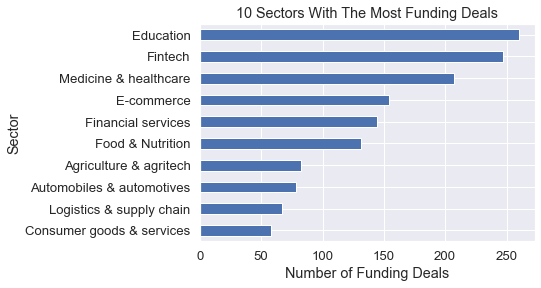

In [103]:
# ploting the top 10 sectors with the most funding deals from 2018-2021
unique_sectors.head(10).sort_values().plot.barh()
plt.xlabel("Number of Funding Deals")
plt.ylabel("Sector")
plt.title("10 Sectors With The Most Funding Deals");

Here, we note that startups in the education (280), fintech (260), and medicine & healthcare (228) sectors were involved in most transactions over the period, with financial services (166) and e-commerce (158) following in distance. The top 10 (out of 202) sectors, by number of deals, make up about 53% of the total deals over the period. It will therefore be fair to conclude that funding is centralized around a few sectors.

### Funding Stage
Operations have to be done on the funding stage column to make it presentable for data analysis

In [104]:
complete_df["Stage"].value_counts().head(60)

Seed                        923
Series A                    305
Pre-series A                194
Series B                    134
Series C                    115
Seed Round                   69
Pre series A                 62
Series D                     49
Pre-seed                     48
Debt                         45
Angel                        37
Venture - Series Unknown     37
Series E                     29
Pre-series B                 14
Debt Financing               13
Pre Series A                 12
Series F                     11
Private Equity               10
Seed round                   10
Bridge                        8
Corporate Round               8
Pre-Seed                      8
Series H                      4
Angel Round                   4
Pre-series A1                 4
Grant                         4
Pre seed round                4
Series G                      3
Seed funding                  3
Pre-series                    3
Post-IPO Equity               3
Secondar

As seen from above, similar funding stage types have to be grouped together and given the same name for easier analysis visualization.

In [105]:
complete_df["Stage"] = complete_df["Stage"].apply(lambda x: str(x).replace(" Round",""))
complete_df["Stage"] = complete_df["Stage"].apply(lambda x: str(x).replace(" round",""))
complete_df["Stage"] = complete_df["Stage"].apply(lambda x: str(x).replace("- Series Unknown",""))

In [106]:
complete_df.loc[complete_df["Stage"]== "Series A"]

,Company/Brand,Sector,Stage,HeadQuarter,Amount($),Year_of_Funding,Investor
2,Myloancare,Financial Services,Series A,Gurgaon,785200.0,2018,NaN
20,Cogoport,Aviation & aerospace,Series A,Mumbai,6000000.0,2018,NaN
25,Agnext technologies,Agriculture & agritech,Series A,Mohali,NaN,2018,NaN
35,Loadshare,Industrial automation,Series A,Bengaluru,5000000.0,2018,NaN
36,Yumlane,Food & Nutrition,Series A,Mumbai,4000000.0,2018,NaN
...,...,...,...,...,...,...,...
2700,Revos,Automobiles & automotives,Series A,Bangalore,4000000.0,2021,NaN
2702,Appsforbharat,Product studio,Series A,Bangalore,10000000.0,2021,Elevation Capital
2704,Bikayi,E-commerce,Series A,Hyderabad,10000000.0,2021,Sequoia Capital India
2706,Dukaan,Retail,Series A,Bangalore,11000000.0,2021,"HOF Capital, Old Well Ventures, LetsVenture, 9..."


In [107]:
# Equating similar entries in the Sector column for ease of analysis (2)
complete_df.loc[complete_df["Stage"] == "$6000000", "Stage"] = "Venture"
complete_df.loc[complete_df["Stage"] == "Debt Financing", "Stage"] = "Debt"
complete_df.loc[complete_df["Stage"] == "Early seed", "Stage"] = "Seed"
complete_df.loc[complete_df["Stage"] == "Fresh Funding", "Stage"] = "Seed"
complete_df.loc[complete_df["Stage"] == "Fresh funding", "Stage"] = "Seed"
complete_df.loc[complete_df["Stage"] == "nan", "Stage"] = "Undisclosed"
complete_df.loc[complete_df["Stage"] == "PE", "Stage"] = "Private Equity"
complete_df.loc[complete_df["Stage"] == "Pre seed", "Stage"] = "Pre-seed"
complete_df.loc[complete_df["Stage"] == "Pre series A1", "Stage"] = "Pre-series A"
complete_df.loc[complete_df["Stage"] == "Pre- series A", "Stage"] = "Pre-series A"
complete_df.loc[complete_df["Stage"] == "Pre-Series A", "Stage"] = "Pre-series A"
complete_df.loc[complete_df["Stage"] == "Pre-Series A1", "Stage"] = "Pre-series A"
complete_df.loc[complete_df["Stage"] == "Seed fund", "Stage"] = "Seed"
complete_df.loc[complete_df["Stage"] == "Seed funding", "Stage"] = "Seed"
complete_df.loc[complete_df["Stage"] == "Seed Funding", "Stage"] = "Seed"
complete_df.loc[complete_df["Stage"] == "Seies A", "Stage"] = "Series A"
complete_df.loc[complete_df["Stage"] == "Series A2", "Stage"] = "Series A"
complete_df.loc[complete_df["Stage"] == "Series I", "Stage"] = "Series A"
complete_df.loc[complete_df["Stage"] == "Pre Series A", "Stage"] = "Pre-series A"
complete_df.loc[complete_df["Stage"] == "Pre series A", "Stage"] = "Pre-series A"
complete_df.loc[complete_df["Stage"] == "Pre series B", "Stage"] = "Pre-series B"
complete_df.loc[complete_df["Stage"] == "Pre series C", "Stage"] = "Pre-series C"
complete_df.loc[complete_df["Stage"] == "Pre-Seed", "Stage"] = "Pre-seed"
complete_df.loc[complete_df["Stage"] == "Pre-series A1", "Stage"] = "Pre-series A"
complete_df.loc[complete_df["Stage"] == "Seed & Series A", "Stage"] = "Series A"
complete_df.loc[complete_df["Stage"] == "Seed A", "Stage"] = "Series A"
complete_df.loc[complete_df["Stage"] == "Seed Investment", "Stage"] = "Seed"
complete_df.loc[complete_df["Stage"] == "Seed+", "Stage"] = "Seed"
complete_df.loc[complete_df["Stage"] == "Pre-Series B", "Stage"] = "Pre-series B"

In [108]:
complete_df["Stage"].value_counts().head(15)

Seed              1011
Undisclosed        512
Series A           309
Pre-series A       274
Series B           134
Series C           115
Pre-seed            63
Debt                58
Series D            49
Angel               41
Venture             37
Series E            29
Pre-series B        18
Private Equity      11
Series F            11
Name: Stage, dtype: int64

Text(0.5, 1.0, 'Number of Funding Per Funding Stage')

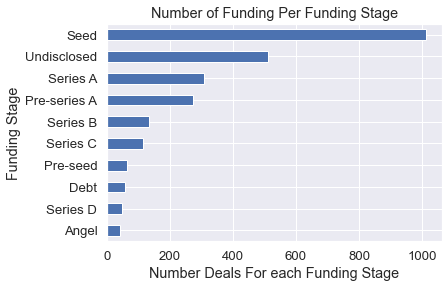

In [109]:
complete_df["Stage"].value_counts().head(10).sort_values().plot.barh()
plt.xlabel("Number Deals For each Funding Stage")
plt.ylabel("Funding Stage")
plt.title("Number of Funding Per Funding Stage")

We note from the plot above that most of the funding stages for deals over the period were undisclosed. For the disclosed stages, "Seed" round had the most deals by a mile (934) followed by "Series A" (311) and "Pre-Series A" (292), with "Series B" and "Series C" following in the distance with 134 and 115 deals respectively.

### Amount
Further processing needs to be done on the Amount column for proper visualization

In [110]:
unique_amount = complete_df["Amount($)"].value_counts()
unique_amount.head(15)

1000000.0     171
2000000.0     116
3000000.0      81
5000000.0      81
500000.0       71
10000000.0     64
4000000.0      54
200000.0       51
1500000.0      47
300000.0       44
6000000.0      44
30000000.0     41
400000.0       39
15000000.0     33
20000000.0     32
Name: Amount($), dtype: int64

In [111]:
pd.set_option("display.float_format",lambda x: '%0.2f'% x)

In [112]:
complete_df.loc[complete_df["Amount($)"]== "nan","Amount($)"] = np.nan
complete_df["Amount($)"].fillna(0.00,inplace= True)




In [113]:
def outliers_IQR(dataframe):
    q1 = dataframe.quantile(0.25)
    q3 = dataframe.quantile(0.75)
    IQR = q3 - q1
    outliers = dataframe[(dataframe<(q1 - 1.5*IQR)) | (dataframe>(q3 + 1.5*IQR))]
    return outliers

outliers = outliers_IQR(complete_df["Amount($)"])
print(f"the number of outliers {str(len(outliers))}","\n")
number_amount = len(complete_df["Amount($)"])
print(f"Percentage outliers is {str(((len(outliers))/((number_amount))*100))}%", "\n")
print(f"The maximumum outlier is {str(outliers.max())}","\n")
print(f"The minimum outlier is {str(outliers.min())}")

the number of outliers 418 

Percentage outliers is 15.305748809959722% 

The maximumum outlier is 150000000000.0 

The minimum outlier is 23850000.0


Since the outliers represent over 15% of the data available, it would be unwise to remove all of them. Outliers from the top and bottom will be selected for confirmation online, then further action taken on them.

In [114]:
# looking the organisations that form the outliers 
amount_sorted = complete_df.loc[complete_df["Amount($)"]!=0].round(2).sort_values(by = "Amount($)")
amount_sorted.head()

,Company/Brand,Sector,Stage,HeadQuarter,Amount($),Year_of_Funding,Investor
1167,Krayonnz,Fintech,Undisclosed,Delhi,9.60,2020,BlueOrchard Finance Limited
1449,Daalchini,Saas,"Series C, D",Mumbai,42.23,2020,CESC Ventures
70,Ultraviolette automotive,Automobiles & automotives,Series A,Bangalore,724.80,2018,NaN
98,Next digital solutions,"Advertising, marketing & sales",Angel,Kota,1208.00,2018,NaN
164,Classworks india,Education,Undisclosed,Chennai,1208.00,2018,NaN


In [115]:
complete_df.loc[(complete_df["Company/Brand"]=="Satya microcapital") & 
(complete_df["Amount($)"] == 9.60), ["Stage","Amount($)","Investor"]] = ["Debt",int(725000000*0.0128),"BlueOrchard Finance S A"]

complete_df.loc[(complete_df["Company/Brand"]=="Satya microcapital")]

,Company/Brand,Sector,Stage,HeadQuarter,Amount($),Year_of_Funding,Investor
469,Satya microcapital,Financial services,Venture,New Delhi,4832000.00,2018,NaN
870,Satya microcapital,Tech,Pre-series B,Gurugram,3000000.00,2020,"Rohit Bansal, Rohan Ranavat"
1793,Satya microcapital,Financial Services,Seed,New Delhi,10000000.00,2021,"responsAbility Investments, Blue Orchard"
1998,Satya microcapital,Fintech,Seed,New Delhi,20000000.00,2021,"BlueOrchard Finance S A, Gojo & Company"


In [116]:
# Ultraviolette Automotive: raised ₹60M Series A funding in 2018
complete_df.loc[(complete_df["Company/Brand"] == "Ultraviolette automotive") &
                 (complete_df["Amount($)"] == 724.80),
                 ["Stage", "Amount($)"]] = ["Series A", int(60000000*0.0128)]

complete_df.loc[(complete_df["Company/Brand"] == "Ultraviolette automotive")]

,Company/Brand,Sector,Stage,HeadQuarter,Amount($),Year_of_Funding,Investor
70,Ultraviolette automotive,Automobiles & automotives,Series A,Bangalore,724.80,2018,NaN
720,Ultraviolette automotive,Spacetech,Undisclosed,Bangalore,0.00,2020,"Venture Catalysts, Speciale Invest"
721,Ultraviolette automotive,Medicine & healthcare,Bridge,New Delhi,0.00,2020,Venture Catalysts


In [117]:
sorted = (complete_df.loc[complete_df["Amount($)"]!=0]).round(2).sort_values(by="Amount($)")
sorted

,Company/Brand,Sector,Stage,HeadQuarter,Amount($),Year_of_Funding,Investor
1167,Krayonnz,Fintech,Undisclosed,Delhi,9.60,2020,BlueOrchard Finance Limited
1449,Daalchini,Saas,"Series C, D",Mumbai,42.23,2020,CESC Ventures
70,Ultraviolette automotive,Automobiles & automotives,Series A,Bangalore,724.80,2018,NaN
98,Next digital solutions,"Advertising, marketing & sales",Angel,Kota,1208.00,2018,NaN
164,Classworks india,Education,Undisclosed,Chennai,1208.00,2018,NaN
...,...,...,...,...,...,...,...
1977,Verse innovation,Innovation management,Series H,Bangalore,1000000000.00,2021,"Canaan Valley Capital, Glade Brook Capital Par..."
943,Purohitji,Multinational conglomerate company,Undisclosed,Mumbai,2200000000.00,2020,"Facebook, Google, KKR, Silver Lake"
932,Qure ai,Tech,Undisclosed,California,3000000000.00,2020,"Salesforce Ventures, Dragoneer Investment Group"
895,Rivigo,Retail,Undisclosed,Mumbai,70000000000.00,2020,"Silver Lake, Mubadala Investment Company"


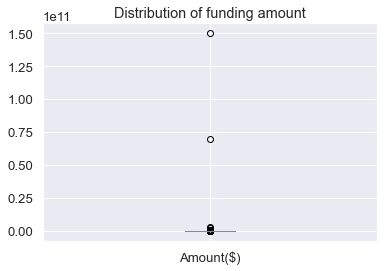

In [118]:
(sorted.loc[sorted["Amount($)"]>0]).plot.box()
(sorted.loc[sorted["Amount($)"]>0]).describe()
plt.title("Distribution of funding amount");

In [119]:
(sorted.loc[sorted["Amount($)"]>0]).describe()

,Amount($)
count,2323.00
mean,120938192.71
std,3434832944.38
min,9.60
25%,976765.00
50%,3000000.00
75%,12000000.00
max,150000000000.00


In [120]:
complete_df.loc[(complete_df["Amount($)"]==150000000000.00)| (complete_df["Amount($)"]==70000000000.00)]

,Company/Brand,Sector,Stage,HeadQuarter,Amount($),Year_of_Funding,Investor
895,Rivigo,Retail,Undisclosed,Mumbai,70000000000.00,2020,"Silver Lake, Mubadala Investment Company"
1736,Alteria capital,Fintech,Debt,Mumbai,150000000000.00,2021,NaN


Despite being correct entries, the top 2 outliers Alteria Capital (index 1736) and Reliance Retail Ventures Ltd (index 895) will be dropped to assess their impact on the amounts.

In [121]:
complete_df_no_outliers = complete_df.drop([895,1736], axis = 0)

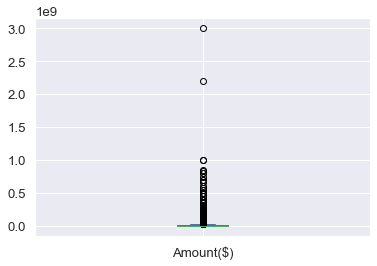

In [122]:
sorted = (complete_df_no_outliers[complete_df_no_outliers["Amount($)"]>0]).round(2).sort_values(by = "Amount($)")
(sorted.loc[sorted["Amount($)"]>0]).describe()
(sorted.loc[sorted["Amount($)"]>0]).plot.box();

In [123]:
(sorted.loc[sorted["Amount($)"]>0]).describe()

,Amount($)
count,2321.00
mean,26255674.99
std,108897136.85
min,9.60
25%,971000.00
50%,3000000.00
75%,12000000.00
max,3000000000.00


Per the boxplots for the complete set with the two major outliers and that without the two major outliers, their effects on the mean is evident, at USD 121.27m with outliers and USD 25.90m without outliers. This represents a stark USD 95.37m difference between the two datasets. Even so, it is visible from the boxplot for the complete set without outliers that there are two more big outliers dragging the USD 25.90m mean outward, with the next looking relatively close to the norm.

As such, the **median** of **USD 3m** (in both cases - with and without outliers) will be used for computations and analysis for the "average" startup. That is to say that the average funding deal over the period was worth **USD 3m**.

## Location

In [124]:
locations = (complete_df.loc[:,"HeadQuarter"]).value_counts()
locations

Bangalore      820
Mumbai         444
Gurugram       227
New Delhi      214
Chennai        104
              ... 
France           1
Palmwoods        1
Bangladesh       1
Paris            1
Gandhinagar      1
Name: HeadQuarter, Length: 120, dtype: int64

In [125]:
complete_df["HeadQuarter"].apply(str)
complete_df["HeadQuarter"].fillna("Unknown Location", inplace = True)
complete_df.loc[complete_df["HeadQuarter"]=="nan","HeadQuarter"] ="Unknown Location"
complete_df.loc[complete_df["HeadQuarter"] == "Bengaluru", "Headquarters"] = "Bangalore"
complete_df.loc[complete_df["HeadQuarter"] == "Bombay", "Headquarters"] = "Mumbai"
complete_df.loc[complete_df["HeadQuarter"] == "Gurugram", "Headquarters"] = "Gurgaon"
complete_df.loc[complete_df["HeadQuarter"] == "Mountain View, CA", "Headquarters"] = "California"

locations = (complete_df.loc[:,"HeadQuarter"]).value_counts()
locations.head(10)

Bangalore           820
Mumbai              444
Gurugram            227
New Delhi           214
Chennai             104
Unknown Location    103
Pune                 98
Delhi                88
Noida                83
Gurgaon              81
Name: HeadQuarter, dtype: int64

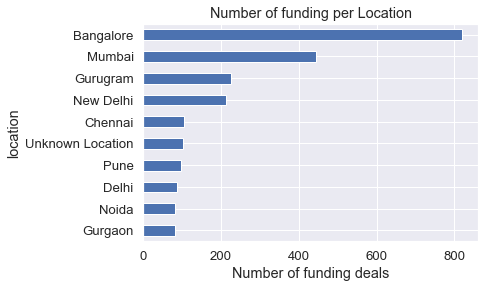

In [126]:
locations.head(10).sort_values().plot.barh()
plt.xlabel("Number of funding deals")
plt.ylabel("location")
plt.title("Number of funding per Location");

From this plot, we can see that **Bangalore** leads as the top location for startups in India followed by **Mumbai**.
There are also quite a number of startups which didn't give their location therefore referred here as Uknown Location.

In [128]:
complete_df["Year_of_Funding"].apply(str)
complete_df["Year_of_Funding"].fillna(np.nan,inplace = True)
funding_year = (complete_df.loc[:,"Year_of_Funding"]).value_counts()
funding_year = funding_year.sort_index()
funding_year

2018     526
2019      89
2020    1055
2021    1061
Name: Year_of_Funding, dtype: int64

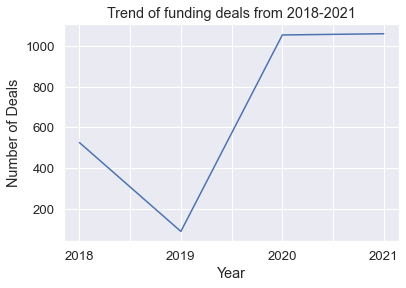

In [129]:
funding_year.plot()
plt.xlabel("Year")
plt.ylabel("Number of Deals")
plt.title("Trend of funding deals from 2018-2021");

In [130]:
complete_df.rename(columns={"Amount($)":"Amount"},inplace=True)

Here, we note that the number of funding deals, despite the big drop in 2019, is increasing. Number of funding deals increased from 526 in 2018 to 1061 in 2021. This implies that chances are fairly high that a new startup would be able to land a funding deal going forward since the number of deals is on an increasing trajectory.

What about the amounts? How have the total amounts invested changed over the period?

In [131]:
funding_year_amount = complete_df.groupby(by = "Year_of_Funding").Amount.agg(["count","sum","mean","median"])
funding_year_amount

,count,sum,mean,median
Year_of_Funding,,,,
2018,526,6427560803.80,12219697.35,500000.00
2019,89,3336433200.00,37488013.48,5500000.00
2020,1055,91431676655.83,86665096.36,1403400.00
2021,1061,179743751000.00,169409755.89,3500000.00


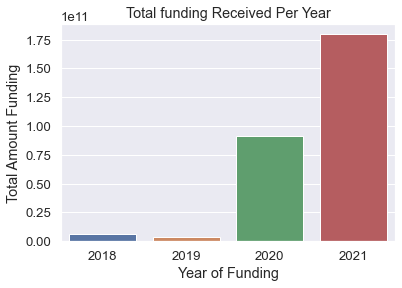

In [132]:
sns.barplot(x = funding_year_amount.index, y = funding_year_amount["sum"])
plt.title("Total funding Received Per Year")
plt.xlabel("Year of Funding")
plt.ylabel("Total Amount Funding");

We note that in line with the increasing number of deals over the period, total amounts invested have been increasing over the period, with investments in 2021 having the highest monetary value.

We must not ignore the fact that despite 2018 having a higher number of transactions, the average amount per deal (USD 12.7bn) was significantly less than that of 2019 (USD 37.5bn)

## Testing of Hypothesis
The research questions set in the initial stages of this data analysis workflow will be investigated.

### 1. What was the trend of start-up funding in India before the occurence of the COVID-19 pandemic (2018-2019)?
### 3. What was the trend of start-up funding in India during the occurence of the COVID-19 pandemic (2020-2021)

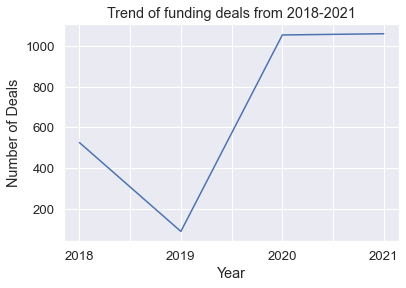

In [133]:
funding_year.plot()
plt.xlabel("Year")
plt.ylabel("Number of Deals")
plt.title("Trend of funding deals from 2018-2021");

In [134]:
complete_df.loc[complete_df["Company/Brand"] == "Super surfaces", "Sector"] = "Furniture & Home Decor"
complete_df.loc[complete_df["Company/Brand"]== "Design cafe", "Sector"] = "Furniture & Home Decor"
complete_df.loc[complete_df["Company/Brand"]== "Flipspaces", "Sector"] = "Furniture & Home Decor"

In [135]:
complete_df.loc[complete_df["Sector"]== "Agritech", "Sector"] = "Agriculture & agritech"
complete_df.loc[complete_df["Sector"]== "Agritech"]

,Company/Brand,Sector,Stage,HeadQuarter,Amount,Year_of_Funding,Investor,Headquarters



### **2. Which start-up sectors received the most funding before the pandemic?**

In [136]:
year_2018_2019 = complete_df.loc[(complete_df["Year_of_Funding"]=="2018") | (complete_df["Year_of_Funding"]=="2019")]

In [137]:
sectors = (year_2018_2019.loc[:,"Sector"]).value_counts()
sectors = sectors.sort_index()

In [138]:
sectors_amount = year_2018_2019.groupby(by = "Sector").Amount.agg(["count","sum","mean","median"]).sort_values(ascending = False,by = "count").head(10)
sectors_amount

,count,sum,mean,median
Sector,,,,
Financial services,55,514851560.00,9360937.45,1000000.00
Education,37,1381613788.00,37340913.19,362400.00
Medicine & healthcare,35,171624625.00,4903560.71,200000.00
Food & Nutrition,33,1443907060.00,43754759.39,604000.00
E-commerce,33,519476800.00,15741721.21,2500000.00
—,30,51321136.00,1710704.53,411400.00
Automobiles & automotives,26,475819090.80,18300734.26,2000000.00
Software,25,137077300.00,5483092.00,362400.00
Ai,19,292215856.00,15379781.89,100000.00


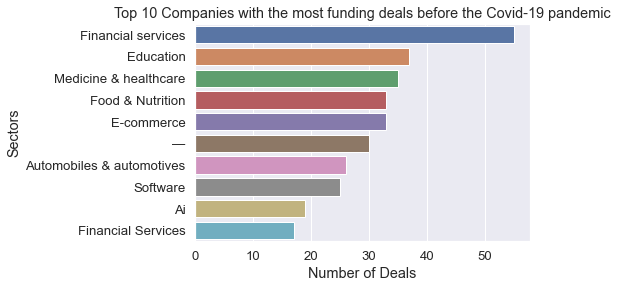

In [139]:
sns.barplot(x = sectors_amount["count"], y = sectors_amount.index)
plt.title("Top 10 Companies with the most funding deals before the Covid-19 pandemic")
plt.xlabel("Number of Deals")
plt.ylabel("Sectors");

In [140]:
sectors_amount = year_2018_2019.groupby(by = "Sector").Amount.agg(["count","sum","mean","median"]).sort_values(ascending = False,by = "sum").head(10)
sectors_amount

,count,sum,mean,median
Sector,,,,
Food & Nutrition,33,1443907060.00,43754759.39,604000.00
Education,37,1381613788.00,37340913.19,362400.00
Insurance,4,958500000.00,239625000.00,107750000.00
Tourism & Hospitality,8,806278800.00,100784850.00,1700000.00
Energy,6,577184200.00,96197366.67,12830000.00
E-commerce,33,519476800.00,15741721.21,2500000.00
Financial services,55,514851560.00,9360937.45,1000000.00
Automobiles & automotives,26,475819090.80,18300734.26,2000000.00
Travel & Transport,10,369166400.00,36916640.00,983200.00


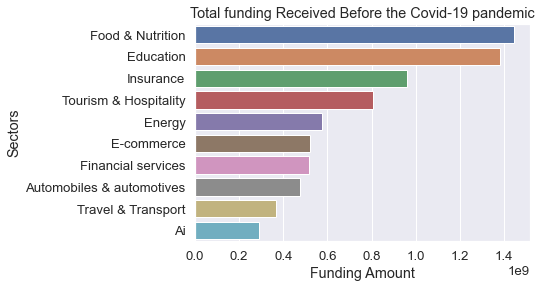

In [141]:
sns.barplot(x = sectors_amount["sum"], y = sectors_amount.index)
plt.title("Total funding Received Before the Covid-19 pandemic")
plt.xlabel("Funding Amount")
plt.ylabel("Sectors");

### **4. Which start-up sectors received the most funding during the COVID-19 pandemic?**

In [142]:
year_2020_2021 = complete_df.loc[(complete_df["Year_of_Funding"]=="2020") | (complete_df["Year_of_Funding"]=="2021")]

In [143]:
sectors_pandemic = (year_2020_2021.loc[:,"Sector"]).value_counts()
sectors_pandemic= sectors_pandemic.sort_index()
sectors_pandemic

AR/VR                              3
Advertising, marketing & sales    14
Advisory                           1
Advisory & consultancy             6
Aeorspace                          1
                                  ..
Warehouse                          1
Water purification                 1
Wholesale                          1
Wl & rac protection                1
Work fulfillment                   1
Name: Sector, Length: 176, dtype: int64

In [144]:
sectors_count_2020_2021= year_2020_2021.groupby(by = "Sector").Amount.agg(["count","sum","mean","median"]).sort_values(ascending = False,by = "count").head(10)
sectors_count_2020_2021

,count,sum,mean,median
Sector,,,,
Fintech,240,154735978909.60,644733245.46,5000000.00
Education,223,6235820030.00,27963318.52,1700000.00
Medicine & healthcare,172,2653339000.00,15426389.53,3000000.00
E-commerce,121,4071513800.00,33648874.38,3900000.00
Food & Nutrition,98,2768069800.00,28245610.20,2000000.00
Financial services,89,2949099000.00,33135943.82,6600000.00
Agriculture & agritech,68,669620000.00,9847352.94,2750000.00
Logistics & supply chain,54,1130618500.00,20937379.63,5780000.00
Automobiles & automotives,52,2634519000.00,50663826.92,4500000.00


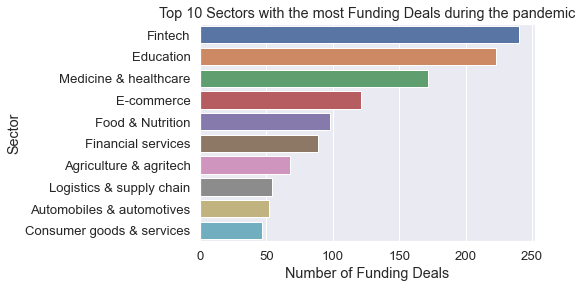

In [145]:
sns.barplot(x = sectors_count_2020_2021["count"], y = sectors_count_2020_2021.index)
plt.title("Top 10 Sectors with the most Funding Deals during the pandemic")
plt.xlabel("Number of Funding Deals")
plt.ylabel("Sector");

In [146]:
sectors_amount = year_2020_2021.groupby(by = "Sector").Amount.agg(["count","sum","mean","median"]).sort_values(ascending = False,by = "sum").head(10)
sectors_amount

,count,sum,mean,median
Sector,,,,
Fintech,240,154735978909.60,644733245.46,5000000.00
Retail,26,70512700000.00,2712026923.08,4000000.00
Education,223,6235820030.00,27963318.52,1700000.00
E-commerce,121,4071513800.00,33648874.38,3900000.00
Tech,35,3418983900.00,97685254.29,1065000.00
Financial services,89,2949099000.00,33135943.82,6600000.00
Food & Nutrition,98,2768069800.00,28245610.20,2000000.00
Medicine & healthcare,172,2653339000.00,15426389.53,3000000.00
Automobiles & automotives,52,2634519000.00,50663826.92,4500000.00


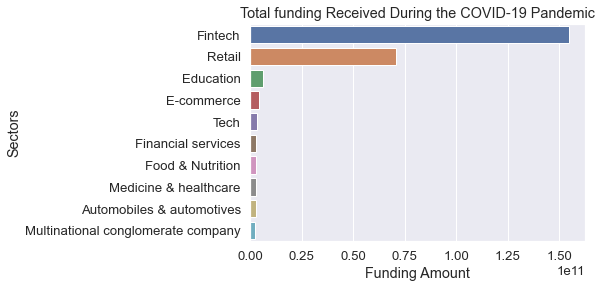

In [147]:
sns.barplot(x = sectors_amount["sum"], y = sectors_amount.index)
plt.title("Total funding Received During the COVID-19 Pandemic")
plt.xlabel("Funding Amount")
plt.ylabel("Sectors");

### **5. What was the total funding received each year before and after the COVID-19 pandemic?**

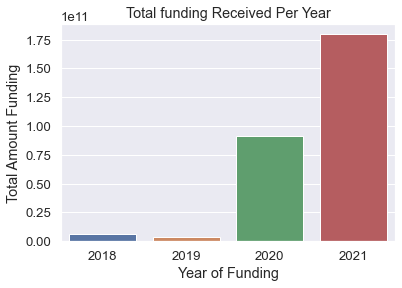

In [148]:
sns.barplot(x = funding_year_amount.index, y = funding_year_amount["sum"])
plt.title("Total funding Received Per Year")
plt.xlabel("Year of Funding")
plt.ylabel("Total Amount Funding");